<a href="https://colab.research.google.com/github/Sophia124990/Tareas_CienciaDatos/blob/main/Clase_19_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Unsupervised machine learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored as cl

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

In [ ]:
#%pip install mpl_toolkits.mplot3d.Axes3
%pip install termcolor

In [ ]:
df = pd.read_csv('/content/cust_seg.csv', sep= ",", decimal=".")
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
#eliminamos la columna Unnamed: 0
#axis=1 es columnas y axis=0 es filas
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

In [ ]:
#verificamos que se haya eliminado la columna unnamed:0
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
#verificar si hay valores repetidos en Id
duplicados = df["Customer Id"].duplicated().sum()
#se imprimen la cantidad de valores repetidos
duplicados

0

In [ ]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


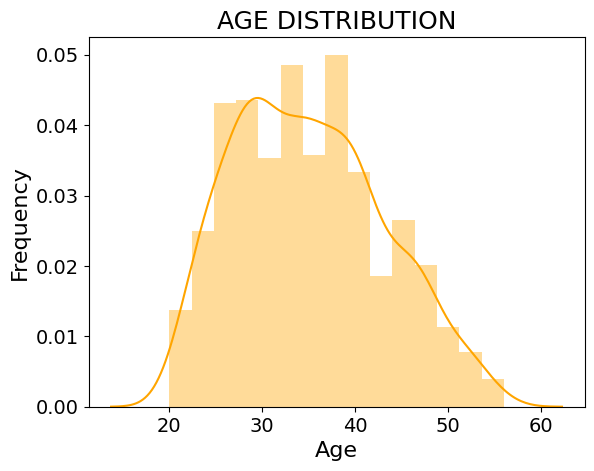

In [ ]:
print(cl(df['Age'].describe(), attrs = ['bold']))

sns.distplot(df['Age'],
            color = 'orange')
plt.title('AGE DISTRIBUTION',
          fontsize = 18)
plt.xlabel('Age',
           fontsize = 16)
plt.ylabel('Frequency',
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

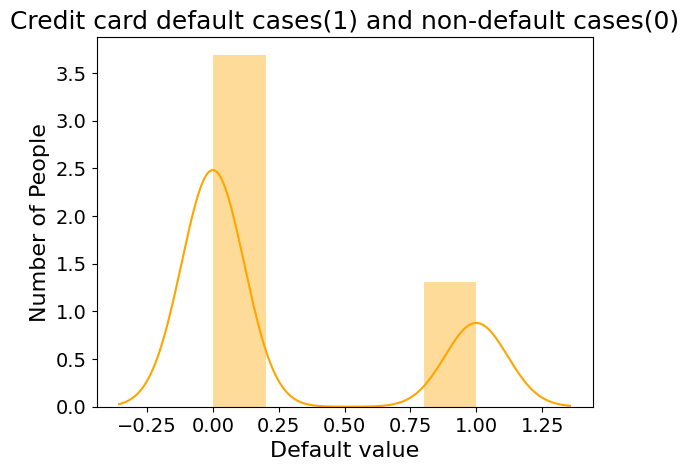

In [ ]:
sns.distplot(df['Defaulted'],
            color = 'orange')
plt.title('Credit card default cases(1) and non-default cases(0)',
          fontsize = 18)
plt.xlabel('Default value',
           fontsize = 16)
plt.ylabel('Number of People',
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

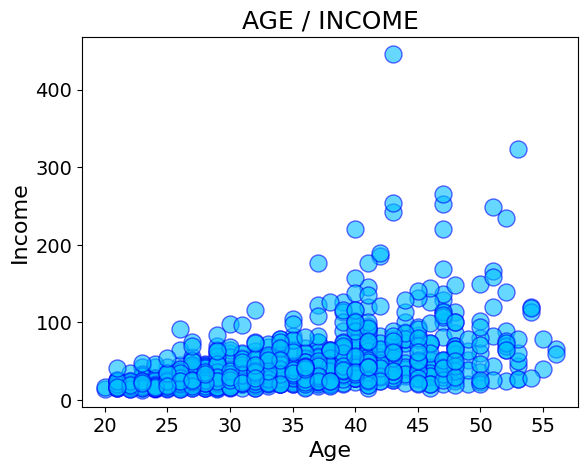

In [ ]:
sns.scatterplot(x='Age', y='Income',
                data=df,
                color='deepskyblue',
                s=150,
                alpha=0.6,
                edgecolor='b')
plt.title('AGE / INCOME', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('age_income.png')
plt.show()

In [ ]:
#queremos los outliers porque tienen mucho dinero en este caso

TypeError: cannot convert the series to <class 'float'>

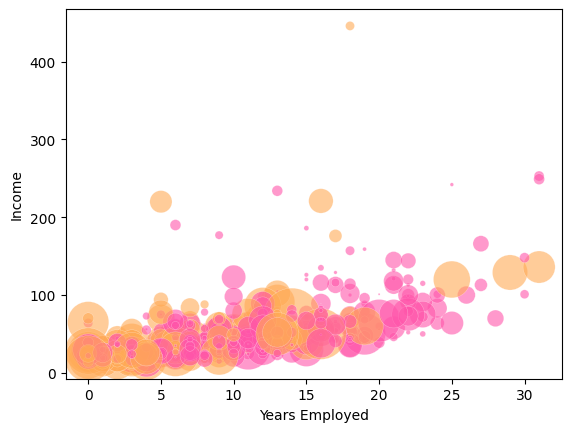

In [ ]:
# Eliminar filas con valores nulos para asegurar que las longitudes coincidan
df_clean = df.dropna(subset=['Years Employed', 'Income', 'DebtIncomeRatio', 'Defaulted'])

# Definir el área con el cuadrado de DebtIncomeRatio
area = df_clean.DebtIncomeRatio ** 2

# Graficar
sns.scatterplot(x='Years Employed', y='Income',
                data=df_clean,
                s=area,
                alpha=0.6,
                edgecolor='white',
                hue='Defaulted',
                palette='spring')
plt.title('YEARS EMPLOYED / INCOME', fontsize=18)
plt.xlabel('Years Employed', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=14)

plt.savefig('y_income.png')
plt.show()

In [ ]:
data = df.copy(deep=True)
data.drop(['Customer Id'], axis=1, inplace=True)
data.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
X = data.values
X = np.nan_to_num(X)
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [ ]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(data)
X = np.nan_to_num(X)
X

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.59494973, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.59494973,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.68081427,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.68081427,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.59494973, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.59494973, -0.2340332 ]])

In [ ]:
clusters = 3
model = KMeans(init = 'k-means++', n_clusters = clusters, n_init=12)
model.fit(X)

KMeans(n_clusters=3, n_init=12)

In [ ]:
labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[1 2 0 1 2 2 1 1 1 2 0 1 1 1 0 1 1 1 2 1 1 1 0 2 2 1 1 1 1 1 1 2 0 1 1 1 0
 0 1 2 0 2 0 2 1 2 1 1 1 1 2 2 0 1 0 0 0 1 1 1 2 1 2 2 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 2 1 1 0 2 1 2 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1]


   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  cluster_num  
0        0.0              6.3            1  
1        0.0             12.8            2  
2        1.0             20.9            0  
3        0.0              6.3            1  
4        0.0              7.2            2  
             Customer Id        Age       Edu  Years Employed      Income  \
cluster_num                                                                 
0             415.211111  30.850000  1.938889        3.700000   31.144444   
1             427.782027  34.091778  1.569790   

TypeError: cannot convert the series to <class 'float'>

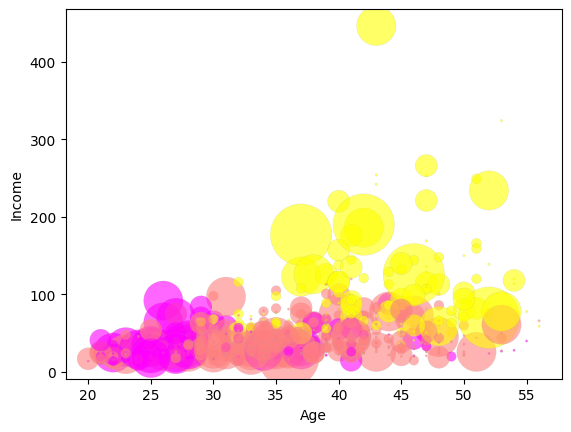

In [ ]:
df['cluster_num'] = labels
print(cl(df.head(), attrs = ['bold']))

print(cl(df.groupby('cluster_num').mean(), attrs = ['bold']))

area = np.pi * (df.Edu) ** 4

sns.scatterplot(x='Age', y='Income',
               data = df,
               s = area,
               hue = 'cluster_num',
               palette = 'spring',
               alpha = 0.6,
               edgecolor = 'darkgrey')
plt.title('AGE / INCOMR (CLUSTERED)',
          fontsize = 18)
plt.xlabel('Age',
           fontsize = 16)
plt.ylabel('Income',
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('c_age_income.png')
plt.show()

In [ ]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [ ]:
grupo_0 = df[df['cluster_num']== 0]
grupo_1 = df[df['cluster_num']== 1]
grupo_2 = df[df['cluster_num']== 2]

In [ ]:
grupo_0.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
count,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000,180.000000,166.000000,180.000000,180.0
mean,415.211111,30.850000,1.938889,3.70000,31.144444,1.685256,2.919261,0.945783,14.747222,0.0
std,238.636864,7.368569,0.963953,3.57349,14.731156,1.506314,2.255706,0.227130,7.348617,0.0
min,3.000000,20.000000,1.000000,0.00000,14.000000,0.073000,0.161000,0.000000,0.900000,0.0
25%,209.000000,25.000000,1.000000,1.00000,20.000000,0.532000,1.322750,1.000000,9.000000,0.0
50%,416.500000,29.000000,2.000000,3.00000,27.000000,1.353500,2.410000,1.000000,14.550000,0.0
75%,604.000000,35.000000,2.000000,6.00000,40.000000,2.295500,3.809000,1.000000,19.575000,0.0
max,848.000000,55.000000,4.000000,15.00000,92.000000,7.754000,15.405000,1.000000,35.300000,0.0


In [ ]:
grupo_1.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,415.000000,523.000000,523.0
mean,427.782027,34.091778,1.569790,7.789675,36.441683,0.821036,1.757168,0.007229,7.585086,1.0
std,249.242235,7.069658,0.853439,5.352134,17.724421,0.756505,1.267749,0.084817,4.514672,0.0
min,1.000000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000,1.0
25%,212.500000,29.000000,1.000000,4.000000,24.000000,0.282000,0.847500,0.000000,4.300000,1.0
50%,416.000000,34.000000,1.000000,7.000000,32.000000,0.583000,1.393000,0.000000,6.800000,1.0
75%,656.500000,39.000000,2.000000,11.000000,44.000000,1.114000,2.421000,0.000000,10.200000,1.0
max,849.000000,56.000000,5.000000,23.000000,120.000000,4.881000,7.286000,1.000000,23.700000,1.0


In [ ]:
grupo_2.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,119.000000,147.000000,147.0
mean,429.979592,43.482993,1.931973,17.285714,102.102041,4.132986,7.976129,0.193277,13.771429,2.0
std,241.728209,5.841929,1.038043,6.415948,59.022951,3.579399,4.975303,0.396538,7.787767,0.0
min,2.000000,29.000000,1.000000,5.000000,30.000000,0.288000,1.003000,0.000000,2.000000,2.0
25%,228.500000,39.500000,1.000000,12.000000,64.500000,1.637000,4.691000,0.000000,7.700000,2.0
50%,455.000000,44.000000,2.000000,17.000000,83.000000,3.153000,7.036000,0.000000,13.000000,2.0
75%,641.500000,47.500000,3.000000,22.000000,119.000000,5.075500,9.676500,0.000000,17.500000,2.0
max,850.000000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000,2.0
